In [ ]:
# This Model was worked on by Kori & Mary. Shout out to Kori.

In [ ]:
# Make sure to pip install keras & tensorflow in Python or you will not be able to run part of the program.
# Before running the data, make sure you have installed keras, tensorflow, and timetk in R

In [21]:
library(keras)
library(tensorflow)
library(readxl)
library(ggplot2)
library(dplyr)
library(timetk)

In [2]:
GoldmanSachs = read.csv(r"(C:\Users\Mary\Documents\Data Science Classes\Final Project\GS.csv)")

head(GoldmanSachs)

Date       Open    High    Low     Close   Adj.Close Volume  
1 1999-05-04 76.0000 77.2500 70.0000 70.3750 53.57680  22320900
2 1999-05-05 69.8750 69.8750 66.2500 69.1250 52.62515   7565700
3 1999-05-06 68.0000 69.3750 67.0625 67.9375 51.72110   2905700
4 1999-05-07 67.9375 74.8750 66.7500 74.1250 56.43165   4862300
5 1999-05-10 73.3750 73.5000 70.2500 70.6875 53.81471   2589400
6 1999-05-11 70.0000 71.1875 69.5000 70.6250 53.76712   1839800

In [3]:
# Creating Scale Factors for Close

scale_factors <- c(mean(GoldmanSachs$Close), sd(GoldmanSachs$Close))

scale_factors

[1] 160.73216  71.17709

In [4]:
# Creating Scaled Train for Close

scaled_train <- GoldmanSachs %>%
    dplyr::select(Close) %>%
    dplyr::mutate(Close = (Close - scale_factors[1]) / scale_factors[2])

head(scaled_train)

Close    
1 -1.269470
2 -1.287032
3 -1.303715
4 -1.216784
5 -1.265079
6 -1.265957

In [5]:
# Creating a lag for prediction

prediction <- 12
lag <- prediction

In [6]:
## Creating a x train array

scaled_train <- as.matrix(scaled_train)
 
# we lag the data 11 times and arrange that into columns
x_train_data <- t(sapply(
    1:(length(scaled_train) - lag - prediction + 1),
    function(x) scaled_train[x:(x + lag - 1), 1]
  ))
 
# now we transform it into 3D form
x_train_arr <- array(
    data = as.numeric(unlist(x_train_data)),
    dim = c(
        nrow(x_train_data),
        lag,
        1
    )
)

head(x_train_data)

x_train_arr

[,1]      [,2]      [,3]      [,4]      [,5]      [,6]      [,7]     
[1,] -1.269470 -1.287032 -1.303715 -1.216784 -1.265079 -1.265957 -1.225565
[2,] -1.287032 -1.303715 -1.216784 -1.265079 -1.265957 -1.225565 -1.229956
[3,] -1.303715 -1.216784 -1.265079 -1.265957 -1.225565 -1.229956 -1.272104
[4,] -1.216784 -1.265079 -1.265957 -1.225565 -1.229956 -1.272104 -1.294056
[5,] -1.265079 -1.265957 -1.225565 -1.229956 -1.272104 -1.294056 -1.294056
[6,] -1.265957 -1.225565 -1.229956 -1.272104 -1.294056 -1.294056 -1.284397
     [,8]      [,9]      [,10]     [,11]     [,12]    
[1,] -1.229956 -1.272104 -1.294056 -1.294056 -1.284397
[2,] -1.272104 -1.294056 -1.294056 -1.284397 -1.297569
[3,] -1.294056 -1.294056 -1.284397 -1.297569 -1.309862
[4,] -1.294056 -1.284397 -1.297569 -1.309862 -1.340595
[5,] -1.284397 -1.297569 -1.309862 -1.340595 -1.352010
[6,] -1.297569 -1.309862 -1.340595 -1.352010 -1.330058

, , 1

                 [,1]          [,2]          [,3]          [,4]          [,5]
   [1,] -1.269470e+00 -1.287032e+00 -1.303715e+00 -1.216784e+00 -1.265079e+00
   [2,] -1.287032e+00 -1.303715e+00 -1.216784e+00 -1.265079e+00 -1.265957e+00
   [3,] -1.303715e+00 -1.216784e+00 -1.265079e+00 -1.265957e+00 -1.225565e+00
   [4,] -1.216784e+00 -1.265079e+00 -1.265957e+00 -1.225565e+00 -1.229956e+00
   [5,] -1.265079e+00 -1.265957e+00 -1.225565e+00 -1.229956e+00 -1.272104e+00
   [6,] -1.265957e+00 -1.225565e+00 -1.229956e+00 -1.272104e+00 -1.294056e+00
   [7,] -1.225565e+00 -1.229956e+00 -1.272104e+00 -1.294056e+00 -1.294056e+00
   [8,] -1.229956e+00 -1.272104e+00 -1.294056e+00 -1.294056e+00 -1.284397e+00
   [9,] -1.272104e+00 -1.294056e+00 -1.294056e+00 -1.284397e+00 -1.297569e+00
  [10,] -1.294056e+00 -1.294056e+00 -1.284397e+00 -1.297569e+00 -1.309862e+00
  [11,] -1.294056e+00 -1.284397e+00 -1.297569e+00 -1.309862e+00 -1.340595e+00
  [12,] -1.284397e+00 -1.297569e+00 -1.309862e+00 -1.340595e+00 -1.352010e+00
  [13,] -1.297569e+00 -1.309862e+00 -1.340595e+00 -1.352010e+00 -1.330058e+00
  [14,] -1.309862e+00 -1.340595e+00 -1.352010e+00 -1.330058e+00 -1.306350e+00
  [15,] -1.340595e+00 -1.352010e+00 -1.330058e+00 -1.306350e+00 -1.303715e+00
  [16,] -1.352010e+00 -1.330058e+00 -1.306350e+00 -1.303715e+00 -1.356401e+00
  [17,] -1.330058e+00 -1.306350e+00 -1.303715e+00 -1.356401e+00 -1.369572e+00
  [18,] -1.306350e+00 -1.303715e+00 -1.356401e+00 -1.369572e+00 -1.364304e+00
  [19,] -1.303715e+00 -1.356401e+00 -1.369572e+00 -1.364304e+00 -1.339717e+00
  [20,] -1.356401e+00 -1.369572e+00 -1.364304e+00 -1.339717e+00 -1.331814e+00
  [21,] -1.369572e+00 -1.364304e+00 -1.339717e+00 -1.331814e+00 -1.362547e+00
  [22,] -1.364304e+00 -1.339717e+00 -1.331814e+00 -1.362547e+00 -1.337961e+00
  [23,] -1.339717e+00 -1.331814e+00 -1.362547e+00 -1.337961e+00 -1.367816e+00
  [24,] -1.331814e+00 -1.362547e+00 -1.337961e+00 -1.367816e+00 -1.369572e+00
  [25,] -1.362547e+00 -1.337961e+00 -1.367816e+00 -1.369572e+00 -1.397671e+00
  [26,] -1.337961e+00 -1.367816e+00 -1.369572e+00 -1.397671e+00 -1.376597e+00
  [27,] -1.367816e+00 -1.369572e+00 -1.397671e+00 -1.376597e+00 -1.341473e+00
  [28,] -1.369572e+00 -1.397671e+00 -1.376597e+00 -1.341473e+00 -1.344986e+00
  [29,] -1.397671e+00 -1.376597e+00 -1.341473e+00 -1.344986e+00 -1.347620e+00
  [30,] -1.376597e+00 -1.341473e+00 -1.344986e+00 -1.347620e+00 -1.281763e+00
  [31,] -1.341473e+00 -1.344986e+00 -1.347620e+00 -1.281763e+00 -1.302837e+00
  [32,] -1.344986e+00 -1.347620e+00 -1.281763e+00 -1.302837e+00 -1.344986e+00
  [33,] -1.347620e+00 -1.281763e+00 -1.302837e+00 -1.344986e+00 -1.344107e+00
  [34,] -1.281763e+00 -1.302837e+00 -1.344986e+00 -1.344107e+00 -1.327424e+00
  [35,] -1.302837e+00 -1.344986e+00 -1.344107e+00 -1.327424e+00 -1.323033e+00
  [36,] -1.344986e+00 -1.344107e+00 -1.327424e+00 -1.323033e+00 -1.306350e+00
  [37,] -1.344107e+00 -1.327424e+00 -1.323033e+00 -1.306350e+00 -1.243127e+00
  [38,] -1.327424e+00 -1.323033e+00 -1.306350e+00 -1.243127e+00 -1.263323e+00
  [39,] -1.323033e+00 -1.306350e+00 -1.243127e+00 -1.263323e+00 -1.261567e+00
  [40,] -1.306350e+00 -1.243127e+00 -1.263323e+00 -1.261567e+00 -1.267713e+00
  [41,] -1.243127e+00 -1.263323e+00 -1.261567e+00 -1.267713e+00 -1.302837e+00
  [42,] -1.263323e+00 -1.261567e+00 -1.267713e+00 -1.302837e+00 -1.313374e+00
  [43,] -1.261567e+00 -1.267713e+00 -1.302837e+00 -1.313374e+00 -1.313374e+00
  [44,] -1.267713e+00 -1.302837e+00 -1.313374e+00 -1.313374e+00 -1.297569e+00
  [45,] -1.302837e+00 -1.313374e+00 -1.313374e+00 -1.297569e+00 -1.304593e+00
  [46,] -1.313374e+00 -1.313374e+00 -1.297569e+00 -1.304593e+00 -1.308106e+00
  [47,] -1.313374e+00 -1.297569e+00 -1.304593e+00 -1.308106e+00 -1.303715e+00
  [48,] -1.297569e+00 -1.304593e+00 -1.308106e+00 -1.303715e+00 -1.301959e+00
  [49,] -1.304593e+00 -1.308106e+00 -1.303715e+00 -1.301959e+00 -1.282641e+00
  [50,] -1.308106e+00 -1.303715e+00 -1.301959e+00 -1.282641e+00 -1.301081e+00
  [51,] -1.3037

In [7]:
# Creating y train

y_train_data <- t(sapply(
    (1 + lag):(length(scaled_train) - prediction + 1),
    function(x) scaled_train[x:(x + prediction - 1)]
))
 
y_train_arr <- array(
    data = as.numeric(unlist(y_train_data)),
    dim = c(
        nrow(y_train_data),
        prediction,
        1
    )
)

head(y_train_data)

[,1]      [,2]      [,3]      [,4]      [,5]      [,6]      [,7]     
[1,] -1.297569 -1.309862 -1.340595 -1.352010 -1.330058 -1.306350 -1.303715
[2,] -1.309862 -1.340595 -1.352010 -1.330058 -1.306350 -1.303715 -1.356401
[3,] -1.340595 -1.352010 -1.330058 -1.306350 -1.303715 -1.356401 -1.369572
[4,] -1.352010 -1.330058 -1.306350 -1.303715 -1.356401 -1.369572 -1.364304
[5,] -1.330058 -1.306350 -1.303715 -1.356401 -1.369572 -1.364304 -1.339717
[6,] -1.306350 -1.303715 -1.356401 -1.369572 -1.364304 -1.339717 -1.331814
     [,8]      [,9]      [,10]     [,11]     [,12]    
[1,] -1.356401 -1.369572 -1.364304 -1.339717 -1.331814
[2,] -1.369572 -1.364304 -1.339717 -1.331814 -1.362547
[3,] -1.364304 -1.339717 -1.331814 -1.362547 -1.337961
[4,] -1.339717 -1.331814 -1.362547 -1.337961 -1.367816
[5,] -1.331814 -1.362547 -1.337961 -1.367816 -1.369572
[6,] -1.362547 -1.337961 -1.367816 -1.369572 -1.397671

In [8]:
# Checking x test

x_test <- GoldmanSachs$Close[(nrow(scaled_train) - prediction + 1):nrow(scaled_train)]

x_test

[1] 333.59 329.90 327.00 324.98 329.16 340.76 343.27 345.38 339.00 343.01
[11] 335.61 336.23

In [9]:
# scale the data with same scaling factors as for training
x_test_scaled <- (x_test - scale_factors[1]) / scale_factors[2]
 
# this time our array just has one sample, as we intend to perform one 12-months prediction
x_pred_arr <- array(
    data = x_test_scaled,
    dim = c(
        1,
        lag,
        1
    )
)

x_pred_arr

, , 1

        [,1]     [,2]     [,3]     [,4]     [,5]     [,6]     [,7]     [,8]
[1,] 2.42856 2.376717 2.335974 2.307594 2.366321 2.529295 2.564559 2.594203
         [,9]    [,10]   [,11]    [,12]
[1,] 2.504568 2.560906 2.45694 2.465651

In [10]:
# Create LSTM model

lstm_model <- keras_model_sequential()
 
lstm_model %>%
  layer_lstm(units = 50, # size of the layer
       batch_input_shape = c(1, 12, 1), # batch size, timesteps, features
       return_sequences = TRUE,
       stateful = TRUE) %>%
  # fraction of the units to drop for the linear transformation of the inputs
  layer_dropout(rate = 0.5) %>%
  layer_lstm(units = 50,
        return_sequences = TRUE,
        stateful = TRUE) %>%
  layer_dropout(rate = 0.5) %>%
  time_distributed(keras::layer_dense(units = 1))

lstm_model

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 lstm_1 (LSTM)                      (1, 12, 50)                     10400       
 dropout_1 (Dropout)                (1, 12, 50)                     0           
 lstm (LSTM)                        (1, 12, 50)                     20200       
 dropout (Dropout)                  (1, 12, 50)                     0           
 time_distributed (TimeDistributed)  (1, 12, 1)                     51          
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
________________________________________________________________________________

In [12]:
# Summary of Model

lstm_model %>%
    compile(loss = 'mae', optimizer = 'adam', metrics = 'accuracy')
 
summary(lstm_model)

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 lstm_1 (LSTM)                      (1, 12, 50)                     10400       
 dropout_1 (Dropout)                (1, 12, 50)                     0           
 lstm (LSTM)                        (1, 12, 50)                     20200       
 dropout (Dropout)                  (1, 12, 50)                     0           
 time_distributed (TimeDistributed)  (1, 12, 1)                     51          
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
________________________________________________________________________________


In [13]:
lstm_model %>% fit(
    x = x_train_arr,
    y = y_train_arr,
    batch_size = 1,
    epochs = 20,
    verbose = 0,
    shuffle = FALSE
)

In [14]:
# Create Forecast

lstm_forecast <- lstm_model %>%
    predict(x_pred_arr, batch_size = 1) %>%
    .[, , 1]
 
# we need to rescale the data to restore the original values
lstm_forecast <- lstm_forecast * scale_factors[2] + scale_factors[1]

lstm_forecast

[1] 322.8835 322.8459 323.3048 323.5752 323.3690 322.9350 322.8618 322.8090
 [9] 323.0027 322.8398 323.0603 323.0355

In [15]:
# Fitted Model

fitted <- predict(lstm_model, x_train_arr, batch_size = 1) %>%
     .[, , 1]

fitted

[,1]      [,2]      [,3]      [,4]      [,5]      [,6]      [,7]     
 [1,] 1.5086401 1.0992500 0.8128105 0.6769471 0.5424203 0.4898368 0.4678166
 [2,] 0.4574009 0.4568494 0.4585110 0.4593821 0.4591086 0.4595592 0.4602942
 [3,] 0.4553618 0.4571710 0.4582496 0.4580685 0.4585905 0.4594252 0.4587852
 [4,] 0.4567422 0.4579551 0.4578783 0.4584475 0.4593149 0.4586991 0.4570435
 [5,] 0.4544494 0.4560286 0.4579970 0.4592555 0.4587398 0.4570806 0.4558169
 [6,] 0.4536004 0.4567024 0.4589454 0.4586999 0.4571082 0.4558437 0.4555517
 [7,] 0.4549269 0.4580127 0.4584787 0.4570772 0.4558630 0.4555718 0.4553867
 [8,] 0.4557330 0.4572998 0.4567985 0.4558270 0.4555998 0.4554141 0.4548631
 [9,] 0.4551906 0.4557014 0.4555652 0.4555674 0.4554408 0.4548879 0.4536558
[10,] 0.4533563 0.4543333 0.4552711 0.4554025 0.4549148 0.4536813 0.4523171
[11,] 0.4522212 0.4541657 0.4551384 0.4548790 0.4537029 0.4523382 0.4520092
[12,] 0.4522022 0.4541218 0.4546372 0.4536704 0.4523574 0.4520282 0.4528984
[13,] 0.4525429 0.4538220 0.4534764 0.4523309 0.4520440 0.4529142 0.4538941
[14,] 0.4528485 0.4529763 0.4522111 0.4520271 0.4529241 0.4539037 0.4531752
[15,] 0.4514874 0.4514420 0.4518423 0.4528994 0.4539195 0.4531898 0.4515258
[16,] 0.4515150 0.4518798 0.4529076 0.4539197 0.4531884 0.4515246 0.4505182
[17,] 0.4514453 0.4526795 0.4538651 0.4531812 0.4515287 0.4505223 0.4508486
[18,] 0.4515796 0.4532938 0.4530454 0.4515089 0.4505319 0.4508589 0.4517215
[19,] 0.4507671 0.4517621 0.4512042 0.4504882 0.4508815 0.4517445 0.4516244
[20,] 0.4496421 0.4501243 0.4502304 0.4508466 0.4517646 0.4516431 0.4515422
[21,] 0.4505499 0.4504483 0.4508975 0.4517700 0.4516379 0.4515377 0.4511336
[22,] 0.4511410 0.4512585 0.4518569 0.4516492 0.4515311 0.4511274 0.4504912
[23,] 0.4517252 0.4520995 0.4517076 0.4515400 0.4511235 0.4504872 0.4494415
[24,] 0.4537722 0.4525618 0.4517433 0.4511464 0.4504686 0.4494249 0.4490105
[25,] 0.4533881 0.4521779 0.4512526 0.4504837 0.4494172 0.4490027 0.4499885
[26,] 0.4526627 0.4515030 0.4505446 0.4494257 0.4489985 0.4499842 0.4511179
[27,] 0.4513282 0.4504545 0.4494042 0.4489956 0.4499862 0.4511198 0.4515392
[28,] 0.4516017 0.4499895 0.4491365 0.4500050 0.4511082 0.4515286 0.4531260
[29,] 0.4513269 0.4498316 0.4501743 0.4511296 0.4515149 0.4531139 0.4544430
[30,] 0.4524115 0.4515286 0.4514584 0.4515597 0.4530873 0.4544176 0.4537876
[31,] ⋮         ⋮         ⋮         ⋮         ⋮         ⋮         ⋮        
[32,] 2.246022  2.244075  2.242290  2.245527  2.244131  2.246744  2.257467 
[33,] 2.247059  2.244228  2.247713  2.246911  2.248892  2.259104  2.263078 
[34,] 2.247164  2.249663  2.249090  2.251667  2.261230  2.264651  2.264728 
[35,] 2.252566  2.251077  2.253999  2.264184  2.266836  2.266349  2.268696 
[36,] 2.253294  2.255562  2.265971  2.269009  2.267985  2.269948  2.270986 
[37,] 2.257268  2.267220  2.270427  2.269724  2.271266  2.271993  2.273300 
[38,] 2.268111  2.271140  2.270542  2.272228  2.272734  2.273884  2.273593 
[39,] 2.271210  2.270681  2.272239  2.272611  2.273844  2.273607  2.274597 
[40,] 2.270401  2.272118  2.272343  2.273413  2.273314  2.274401  2.271910 
[41,] 2.271547  2.272001  2.272845  2.272499  2.273825  2.271500  2.268209 
[42,] 2.271166  2.272349  2.271727  2.272739  2.270718  2.267636  2.263676 
[43,] 2.271358  2.271113  2.271832  2.269472  2.266722  2.262990  2.263220 
[44,] 2.269855  2.271057  2.268353  2.265178  2.261847  2.262358  2.263960 
[45,] 2.269834  2.267586  2.264119  2.260420  2.261281  2.263145  2.259389 
[46,] 2.266488  2.263448  2.259524  2.260080  2.262236  2.258702  2.258024 
[47,] 2.262670  2.259015  2.259458  2.261451  2.258100  2.257552  2.256666 
[48,] 2.258459  2.259084  2.261019  2.257564  2.257135  2.256338  2.254497 
[49,] 2.259087  2.260970  2.257562  2.257195  2.256364  2.254498  2.255631 
[50,] 2.261473  2.257819  2.257587  2.256951  2.254923  2.255937  2.258791 
[51,] 2.258424  2.257935  2.257409  2.255557  2.256415  2.259148  2.260320 
[52,] 2.258926  2.257986  2.256336  2.257506  2.259958

In [16]:
# Checking if Fitted
if (dim(fitted)[2] > 1) {
    fit <- c(fitted[, 1], fitted[dim(fitted)[1], 2:dim(fitted)[2]])
} else {
    fit <- fitted[, 1]
}
 
# additionally we need to rescale the data
fitted <- fit * scale_factors[2] + scale_factors[1]
nrow(fitted) 

NULL

In [17]:
# I specify first forecast values as not available
fitted <- c(rep(NA, lag), fitted)

In [26]:
# Forecast

lstm_forecast <- timetk::tk_ts(lstm_forecast,
    start = c(2022, 5),
    end = c(2023, 4),
    frequency = 12
)

lstm_forecast

Jan      Feb      Mar      Apr      May      Jun      Jul      Aug     
2022                                     322.8835 322.8459 323.3048 323.5752
2023 323.0027 322.8398 323.0603 323.0355                                    
     Sep      Oct      Nov      Dec     
2022 323.3690 322.9350 322.8618 322.8090
2023

In [30]:
# Creating Timetk input

input_ts <- timetk::tk_ts(GoldmanSachs$Close, 
    start = c(1999, 7), 
    end = c(2022, 4), 
    frequency = 12)

In [31]:
# Creating Forecast List
forecast_list <- list(
    model = NULL,
    method = "LSTM",
    mean = lstm_forecast,
    x = input_ts,
    fitted = fitted,
    residuals = as.numeric(input_ts) - as.numeric(fitted)
  )
 
class(forecast_list) <- "forecast"

Warning message in as.numeric(input_ts) - as.numeric(fitted):
"longer object length is not a multiple of shorter object length"


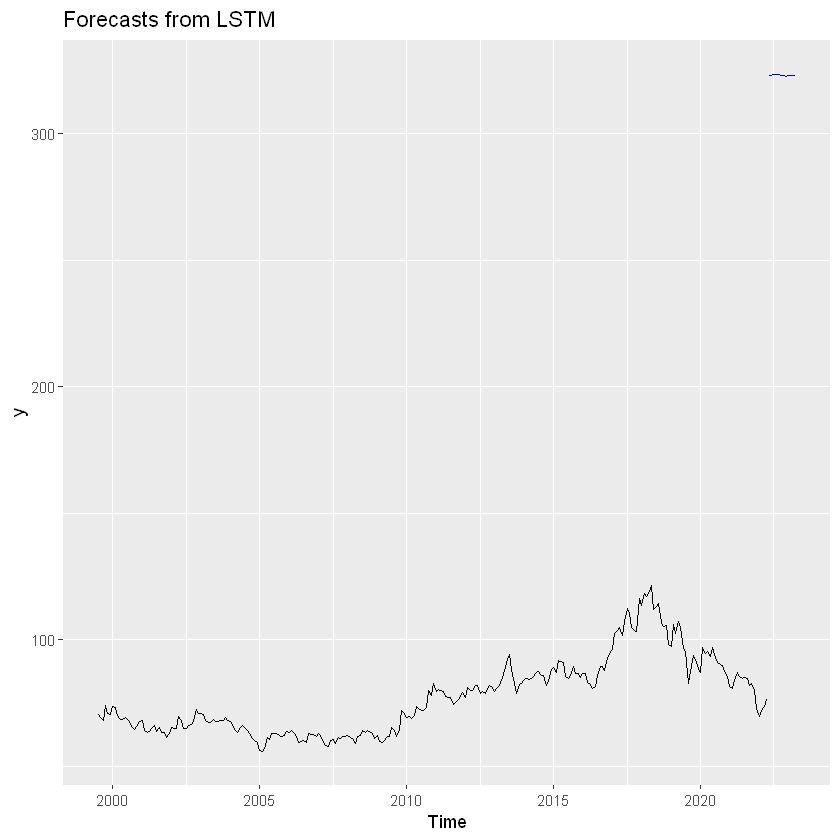

In [32]:
# Forecast Line Model
forecast::autoplot(forecast_list)